# Support Vector Machine

In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()

,X,Y,Class
0,11.971797,-7.504889,3
1,-8.277160,3.589366,2
2,6.159895,-3.174328,3
3,-8.445008,3.845746,2
4,-8.012580,2.902211,2


In [2]:
df.describe()

,X,Y,Class
count,5000.000000,5000.000000,5000.000000
mean,-0.178067,-0.579911,1.500000
std,5.998181,4.412769,1.118146
min,-13.718486,-19.716218,0.000000
25%,-7.127540,-3.457994,0.750000
50%,0.393012,-0.002115,1.500000
75%,4.487479,3.094766,2.250000
max,21.494466,10.981597,3.000000


<AxesSubplot:xlabel='X', ylabel='Y'>

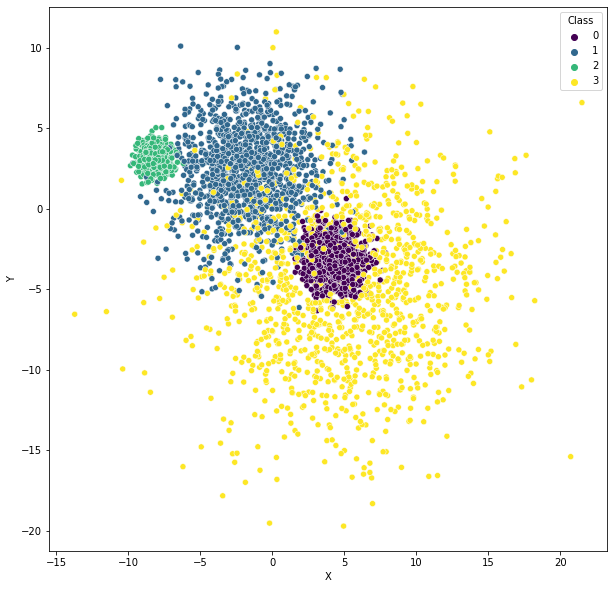

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='X', y='Y', hue='Class', palette='viridis')

In [4]:
import numpy as np

train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.333*len(df)), int(.666*len(df))])
len(train), len(test), len(val)

(1665, 1665, 1670)

<AxesSubplot:xlabel='X', ylabel='Y'>

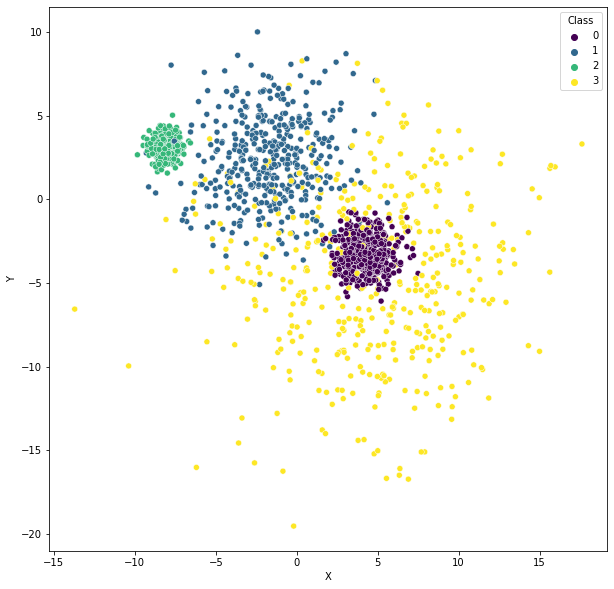

In [5]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=train, x='X', y='Y', hue='Class', palette='viridis')

In [6]:
xTrain = train[['X', 'Y']].values
yTrain = train['Class'].values
xTest = test[['X', 'Y']].values
yTest = test['Class'].values
xVal = val[['X', 'Y']].values
yVal = val['Class'].values

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

accuracies = []
Cs = []

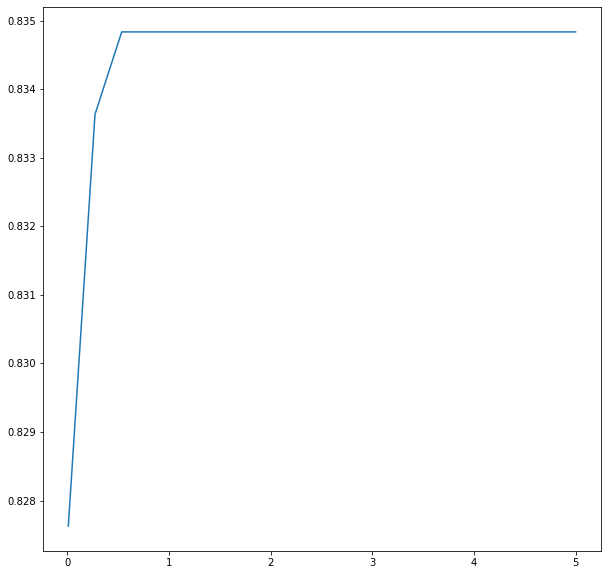

In [8]:
for C in np.linspace(0.01, 5, 20):
    model = SVC(C=C, kernel='linear')
    model.fit(xTrain, yTrain)
    
    test_pred = model.predict(xTest)
    test_acc = accuracy_score(yTest, test_pred)
    
    Cs.append(C)
    accuracies.append(test_acc)
    
plt.figure(figsize=(10,10))
ax = sns.lineplot(x=Cs, y=accuracies)

<img src="svm.png">

In [9]:
model2 = SVC(C=Cs[np.argmax(accuracies)], kernel='linear')
model2.fit(xTrain, yTrain)

SVC(C=0.5352631578947369, kernel='linear')

In [10]:
def plot_model(model, train):
    plt.figure(figsize=(10,10))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.scatter(train['X'], train['Y'], c=yTrain, cmap='jet')
    
    X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000),
                      np.linspace(train['Y'].min(), train['Y'].max(), 1000))
    
    Z = model.predict(np.c_[X.ravel(), Y.ravel()])
    Z = Z.reshape(X.shape)
    
    ax.contourf(X, Y, Z, cmap='jet', alpha=0.25)

<Figure size 720x720 with 0 Axes>

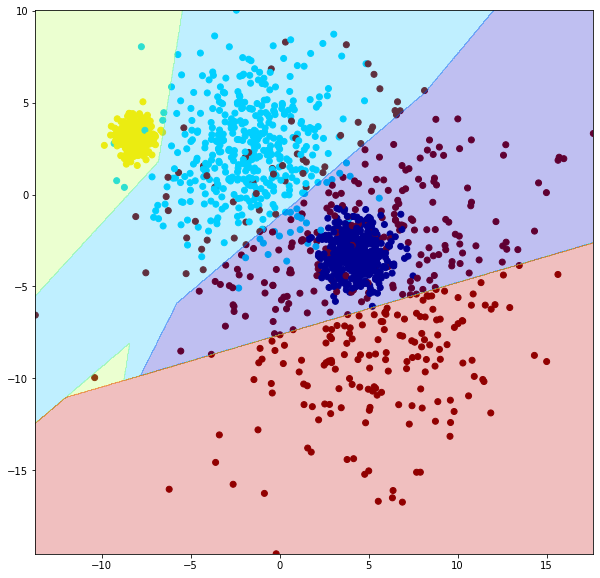

In [11]:
plot_model(model2, train)

<Figure size 720x720 with 0 Axes>

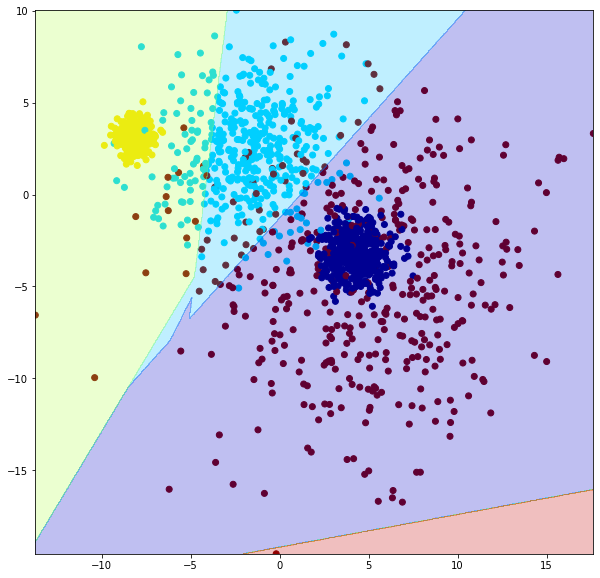

In [12]:
model00 = SVC(C=0.0001, kernel='linear')
model00.fit(xTrain, yTrain)

plot_model(model00, train)

<Figure size 720x720 with 0 Axes>

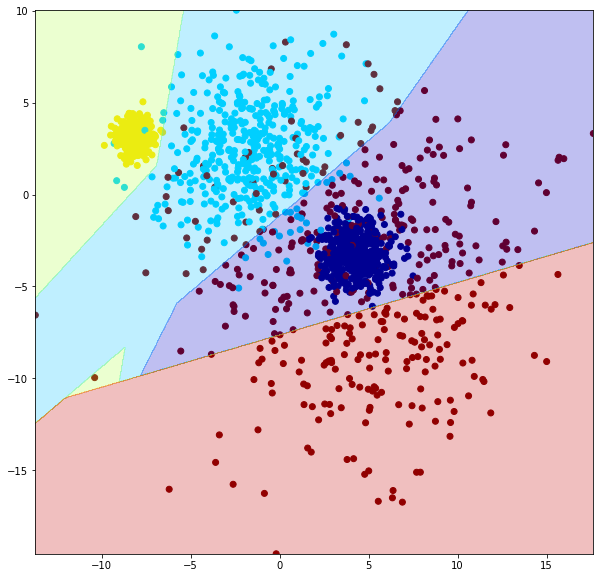

In [13]:
model01 = SVC(C=2, kernel='linear')
model01.fit(xTrain, yTrain)

plot_model(model01, train)

In [14]:
accuracies=[]
params=[]

for C in np.linspace(0.01, 5, 20):
    for degree in range(2, 10):
        model = SVC(C=C, degree=degree, kernel='poly')
        model.fit(xTrain, yTrain)
    
        test_pred = model.predict(xTest)
        test_acc = accuracy_score(yTest, test_pred)
    
        params.append({'C':C, 'degree':degree})
        accuracies.append(test_acc)
        
model3 = SVC(C=params[np.argmax(accuracies)]['C'], degree=params[np.argmax(accuracies)]['degree'], kernel='poly')
model3.fit(xTrain, yTrain)

SVC(C=3.6868421052631577, kernel='poly')

<Figure size 720x720 with 0 Axes>

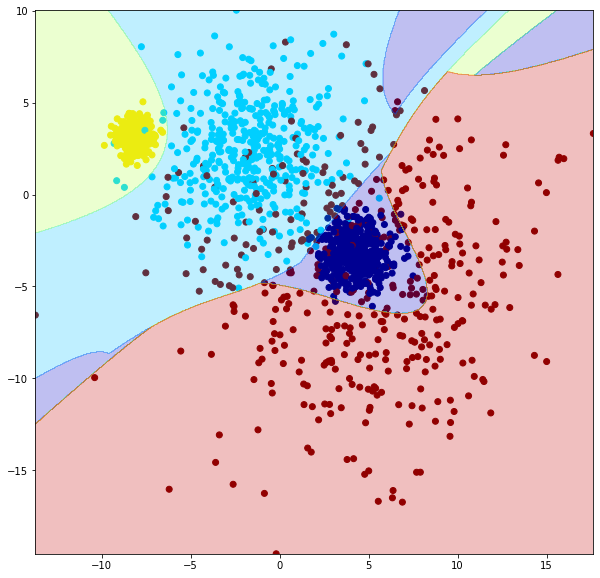

In [15]:
plot_model(model3, train)

In [16]:
accuracies=[]
params=[]

for c in np.linspace(0.01, 5, 20):
    for g in np.linspace(0.001, 2, 40):
        model = SVC(C=c, gamma=g, kernel='rbf') #Radial (radius) basis function
        model.fit(xTrain, yTrain)
    
        test_pred = model.predict(xTest)
        test_acc = accuracy_score(yTest, test_pred)
    
        params.append({'c':c, 'g':g})
        accuracies.append(test_acc)
        
model4 = SVC(C=params[np.argmax(accuracies)]['c'], gamma=params[np.argmax(accuracies)]['g'], kernel='rbf')
model4.fit(xTrain, yTrain)

SVC(C=0.7978947368421053, gamma=0.05225641025641026)

<Figure size 720x720 with 0 Axes>

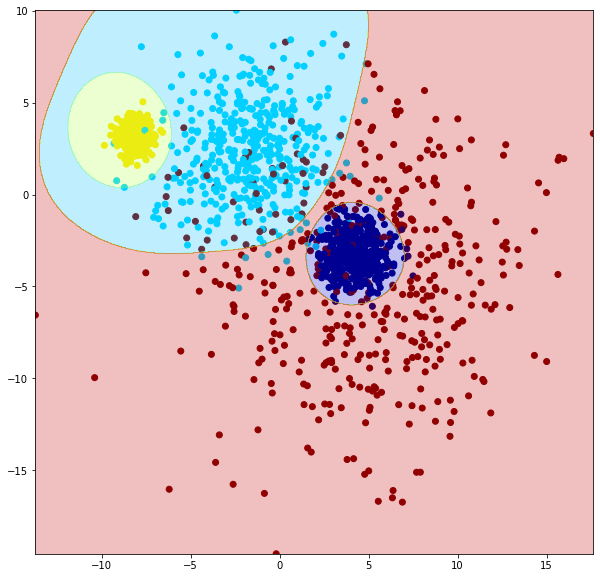

In [17]:
plot_model(model4, train)

In [18]:
model2_pred = model2.predict(xVal)
model2_acc = accuracy_score(yVal, model2_pred)

model3_pred = model3.predict(xVal)
model3_acc = accuracy_score(yVal, model3_pred)

model4_pred = model4.predict(xVal)
model4_acc = accuracy_score(yVal, model4_pred)

print(model2_acc)
print(model3_acc)
print(model4_acc)

0.8167664670658683
0.8880239520958084
0.9149700598802395


### Particle swarm optimization

<img src="pso.gif">

In [19]:
import optunity

print(optunity.__version__)

1.0.0


In [20]:
import optunity.cross_validation
import optunity.metrics

import time
start = time.time()

@optunity.cross_validated(x=xTrain, y=yTrain, num_folds=10, num_iter=1,
                         strata=optunity.cross_validation.strata_by_labels(yTrain))
def PSO(x_train, y_train, x_test, y_test, c, g):
    model = SVC(C=c, gamma=g, kernel='rbf') #Radial (radius) basis function
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    return optunity.metrics.accuracy(y_test, predictions)

solver = optunity.solvers.ParticleSwarm(num_particles=100, num_generations=1, c=[0.01, 5], g=[0.001, 2])
hpars, info = optunity.optimize(solver, PSO)

print(time.time()-start)

135.391841173172


In [21]:
Model = SVC(C=hpars['c'], gamma=hpars['g'], kernel='rbf', probability=True)
Model.fit(xTrain, yTrain)
predictions=Model.predict(xTest)
accuracy_score(yTest, predictions)

0.9279279279279279

Accuracy: 0.9264634154069743
F1: 0.9268126688859624
Loss: 0.23218916285513863
Cross validation: [0.92  0.911 0.929 0.915 0.929]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       385
           1       0.90      0.93      0.92       424
           2       0.99      1.00      1.00       450
           3       0.90      0.81      0.85       406

    accuracy                           0.93      1665
   macro avg       0.93      0.93      0.93      1665
weighted avg       0.93      0.93      0.93      1665



/Users/joseluis/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


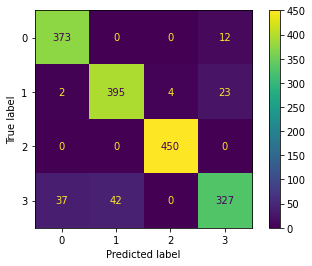

In [22]:
from sklearn import metrics
from sklearn import model_selection

probabilities = Model.predict_proba(xTest)

print("Accuracy:",metrics.balanced_accuracy_score(yTest, predictions))
print("F1:", metrics.f1_score(yTest, predictions, average='weighted'))
print("Loss:", metrics.log_loss(yTest, probabilities))
print("Cross validation:", model_selection.cross_val_score(Model, df[['X', 'Y']], df['Class']))

print(metrics.classification_report(yTest, predictions))

metrics.plot_confusion_matrix(Model, xTest, yTest)